## Let's try random forest

In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

In [64]:
# Read the csv data file
csv_df = pd.read_csv("flood_data.csv")
print(df.head(10))

     Id  FID_1     Slope   Elevation  Curvature         Flow    Riverdist   
0     1      0  1.689661  110.535135  -0.002344    17.201465   470.116814  \
1   324      0  0.000000    0.000000   0.000000     0.000000     0.000000   
2  1108      0  0.000000    0.000000   0.000000     0.000000     0.000000   
3  2089      0  0.000000    0.000000   0.000000     0.000000     0.000000   
4     2      1  1.479130  110.015267   0.004390    41.572409   136.361816   
5     3      2  1.732994  110.340081  -0.000641   478.595596   241.111983   
6     4      3  1.162147  109.844765   0.004499  1867.655536   646.397122   
7     5      4  1.962648  111.210773   0.021435     6.598086  1099.115732   
8     6      5  1.508466  111.137602  -0.006919  2222.709459   788.029160   
9     7      6  1.687978  111.204082   0.005614    19.722222   406.156613   

   Drianagede  Geology     Rainfall       SPI       TWI         CN  FID_12   
0    0.472849      4.0  1458.956124 -5.126487  8.340174  79.000000       0

In [65]:
# Let's look at the shape file
map_data = gpd.read_file("grid/Grod_FID_Link.shp")
print(map_data.head(4))
# print(map_data.columns)
# map_data.plot()
# plt.show()

   Id  FID_1     Slope   Elevation  Curvature         Flow   Riverdist   
0   1      0  1.689661  110.535135  -0.002344    17.201465  470.116814  \
1   2      1  1.479130  110.015267   0.004390    41.572409  136.361816   
2   3      2  1.732994  110.340081  -0.000641   478.595596  241.111983   
3   4      3  1.162147  109.844765   0.004499  1867.655536  646.397122   

   Drianagede  Geology     Rainfall       SPI       TWI         CN  FID_12   
0    0.472849      4.0  1458.956124 -5.126487  8.340174  79.000000       0  \
1    0.449710      4.0  1458.862200 -6.080705  8.253986  79.000000       1   
2    0.401828      4.0  1458.667447 -5.685058  8.584023  79.008876       2   
3    0.310336      4.0  1458.696249 -6.736262  8.794300  79.000000       3   

   SUS                                           geometry  
0    0  POLYGON ((438219.307 3166965.520, 438219.307 3...  
1    4  POLYGON ((438719.307 3166965.520, 438719.307 3...  
2    3  POLYGON ((439219.307 3166965.520, 439219.307 3... 

In [66]:
df = map_data.merge(csv_df[['FID_1', 'flood_label']] , on='FID_1' )
print(df.head())

     Id  FID_1     Slope   Elevation  Curvature       Flow   Riverdist   
0     1      0  1.689661  110.535135  -0.002344  17.201465  470.116814  \
1   324      0  0.000000    0.000000   0.000000   0.000000    0.000000   
2  1108      0  0.000000    0.000000   0.000000   0.000000    0.000000   
3  2089      0  0.000000    0.000000   0.000000   0.000000    0.000000   
4     2      1  1.479130  110.015267   0.004390  41.572409  136.361816   

   Drianagede  Geology     Rainfall       SPI       TWI    CN  FID_12  SUS   
0    0.472849      4.0  1458.956124 -5.126487  8.340174  79.0       0    0  \
1    0.000000      0.0     0.000000  0.000000  0.000000   0.0    3593    0   
2    0.000000      0.0     0.000000  0.000000  0.000000   0.0    3594    0   
3    0.000000      0.0     0.000000  0.000000  0.000000   0.0    3595    1   
4    0.449710      4.0  1458.862200 -6.080705  8.253986  79.0       1    4   

                                            geometry  flood_label  
0  POLYGON ((43821

<Axes: title={'center': 'Riverdist'}>

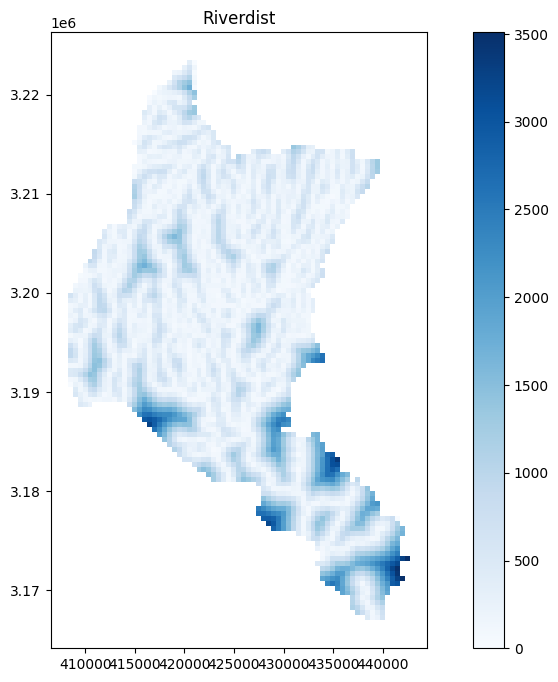

In [67]:
data_headers = ['Slope', 'Elevation', 'Curvature', 'Flow', 'Riverdist',
       'Drianagede', 'Geology', 'Rainfall', 'SPI', 'TWI', 'CN']

# for header in data_headers:
#     fig, ax = plt.subplots(figsize=(5, 5))
#     ax.set_title(header)
#     map_data.plot(column=header, cmap='Blues', legend=True, ax=ax)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Riverdist')
df.plot(column='Riverdist', cmap='Blues', legend=True, ax=ax)



In [68]:
print(df.describe().T)

              count          mean           std        min          25%   
Id           3596.0   1798.500000   1038.220112   1.000000   899.750000  \
FID_1        3596.0   1796.521691   1039.151299   0.000000   896.750000   
Slope        3596.0      5.195020      7.064653   0.000000     1.896698   
Elevation    3596.0    218.403535    200.261704   0.000000   130.360469   
Curvature    3596.0      0.007627      0.106085  -0.548571    -0.006400   
Flow         3596.0  10417.993098  81044.612342   0.000000    30.719900   
Riverdist    3596.0    568.512648    559.737267   0.000000   178.124502   
Drianagede   3596.0      0.719725      0.472245   0.000000     0.384052   
Geology      3596.0      3.721806      0.623076   0.000000     4.000000   
Rainfall     3596.0   1551.534375     80.756792   0.000000  1513.436044   
SPI          3596.0     -4.203411      1.725860 -17.428923    -5.256492   
TWI          3596.0      7.611418      1.119927   0.000000     7.199207   
CN           3596.0     8

In [69]:
# Check if any data is null values
print(df.isnull().sum())

Id             0
FID_1          0
Slope          0
Elevation      0
Curvature      0
Flow           0
Riverdist      0
Drianagede     0
Geology        0
Rainfall       0
SPI            0
TWI            0
CN             0
FID_12         0
SUS            0
geometry       0
flood_label    0
dtype: int64


In [70]:
df = df.rename(columns={'flood_label': 'Label'})
print(df.dtypes)

Id               int64
FID_1            int64
Slope          float64
Elevation      float64
Curvature      float64
Flow           float64
Riverdist      float64
Drianagede     float64
Geology        float64
Rainfall       float64
SPI            float64
TWI            float64
CN             float64
FID_12           int64
SUS              int64
geometry      geometry
Label            int64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

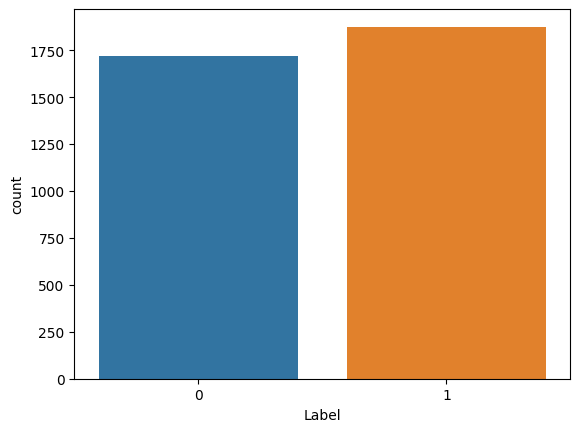

In [71]:
#Understand the data 
# The dataset does not include the same number of flooded and not flooded locations
sns.countplot(x="Label", data=df) #0 - Notflooded   1 - Flooded

In [72]:
# Get one df which don't have geometry
df_no_geometry = df.drop(columns=['geometry'], inplace=False)

<Axes: >

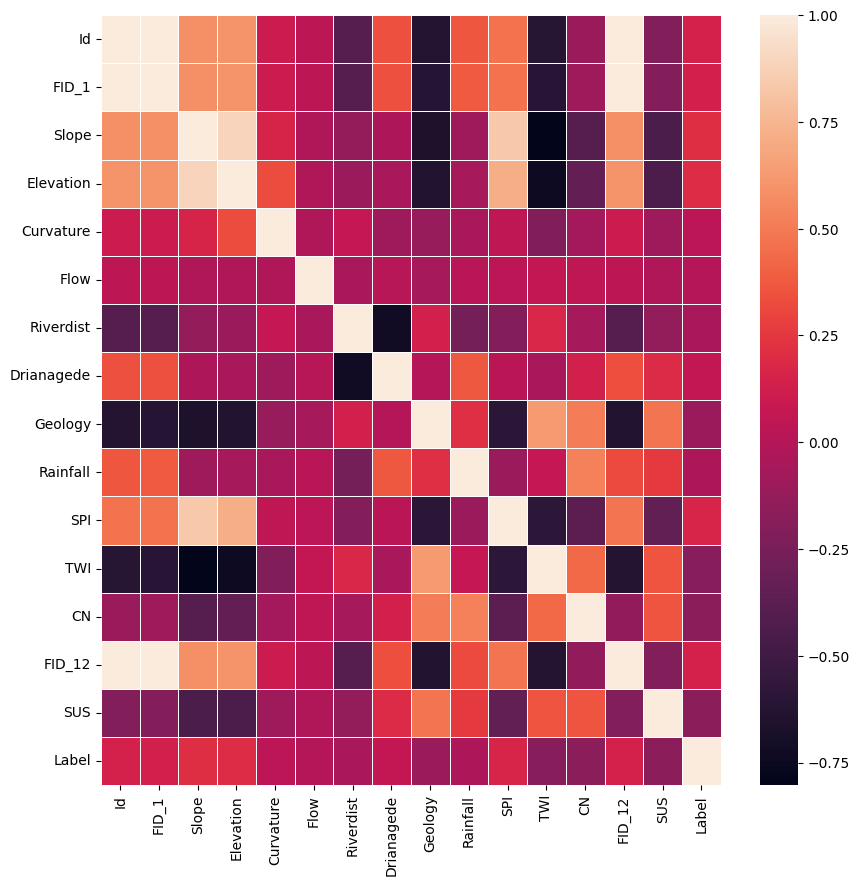

In [73]:
# Correlation between the input features

corrMatrix = df_no_geometry.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(corrMatrix, annot=False, linewidths=.5, ax=ax)

In [74]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Label"].values

In [75]:
#Define the independent variables. 
X = df.drop(labels = ["Label",'geometry'], axis=1) 
features_list = list(X.columns)  #List features so we can rank them later.
#from sklearn.preprocessing import normalize
# Only needed if the data was not normalized
#X = normalize(X, axis=1)

In [76]:
# the independent variables
X

,Id,FID_1,Slope,Elevation,Curvature,Flow,Riverdist,Drianagede,Geology,Rainfall,SPI,TWI,CN,FID_12,SUS
0,1,0,1.689661,110.535135,-0.002344,17.201465,470.116814,0.472849,4.0,1458.956124,-5.126487,8.340174,79.00000,0,0
1,324,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,3593,0
2,1108,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,3594,0
3,2089,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,3595,1
4,2,1,1.479130,110.015267,0.004390,41.572409,136.361816,0.449710,4.0,1458.862200,-6.080705,8.253986,79.00000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,3595,3594,14.930294,247.070501,0.524094,6.000000,366.277028,0.339504,0.0,1454.244427,-0.838931,6.696055,0.00000,3591,1
3592,3596,3595,30.948477,344.521368,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.513776,4.667498,0.00000,3592,1
3593,325,324,0.000000,119.000000,0.000000,0.400000,2646.089380,0.000000,4.0,1486.817310,-14.494613,9.518426,79.00000,0,0
3594,1110,1109,2.207898,130.623750,-0.002400,193.138750,154.414470,0.567193,4.0,1591.077780,-4.089240,8.031676,85.41875,0,0


In [77]:
# the dependent variable
Y

array([1, 1, 1, ..., 0, 1, 1])

In [78]:
#Split data into train, validation and test to verify accuracy after fitting the model. 
# Firstly split the data into train_validation and test datasets then split the train_validation dataset into train and validation datasets.
# The training dataset is used to train the model, the validation dataset is used for hyperparamter tuning and the testing dataset is used to test the model.
# It is recommended to test the model with a data that the model hasn't seen in the training process
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True, random_state=42)

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=42)

In [80]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)

In [81]:
# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Model prediction
prediction = model.predict(X_test)

In [83]:
# Prediction are 1 (Flooded) and 0 (Not flooded)
prediction

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

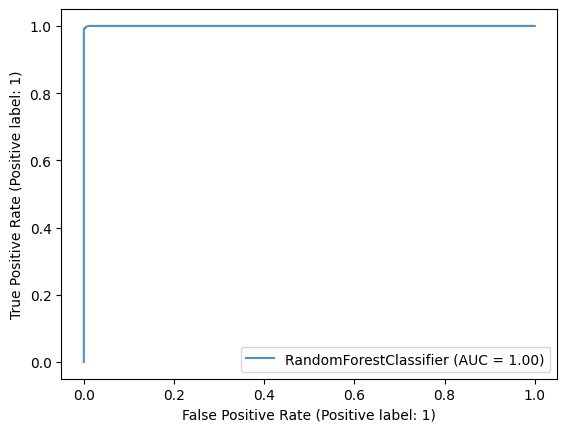

In [85]:
# Draw the Receiver Operating Characteristics and estimate the Area under the curve (AUC)
# for more information about the AUC, please see https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
model_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [86]:
# In order to map the flood susceptibility, we need to predict the flood susceptibility (probability between 0 and 1)
prediction_prob=model.predict_proba(X_test)

In [87]:
# The probability of being not flooded and flooded for every location ( Their summation equals 1)
prediction_prob

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ],
       ...,
       [0.02, 0.98],
       [0.9 , 0.1 ],
       [0.98, 0.02]])

In [88]:
ls=prediction_prob[:,1]
ls.shape

(720,)

In [89]:
# As flood susceptibility is classification problem (flooded or not flooded), we can calculate some additional performance indices
from sklearn.metrics import classification_report
target_names=["Not Flooded","Flooded"]
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

 Not Flooded       0.99      1.00      1.00       352
     Flooded       1.00      0.99      1.00       368

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [90]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, prediction))

0.9916640938561284


In [91]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[352   0]
 [  3 365]]


In [92]:
#importances = list(model_RF.feature_importances_)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

FID_1         0.263137
FID_12        0.247398
Id            0.247360
Elevation     0.058349
Rainfall      0.052132
Geology       0.031735
CN            0.023348
Drianagede    0.014644
Slope         0.013641
TWI           0.011770
SPI           0.009926
Riverdist     0.008421
Flow          0.006987
Curvature     0.006517
SUS           0.004635
dtype: float64


<Axes: >

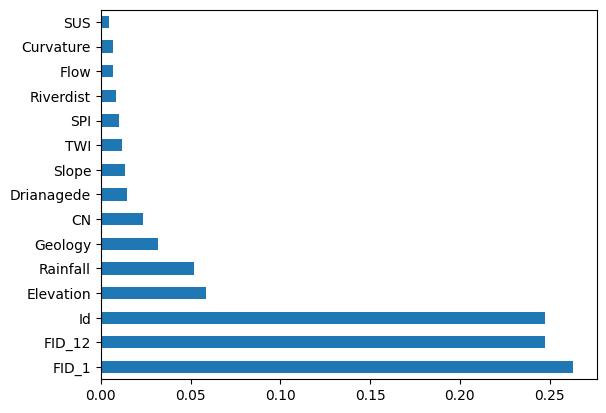

In [93]:
feature_imp.plot.barh()